# LinearRegression  - This is a linear regregssion example using Keras

    Copyright (C) 2020 Adrian Bevan, and 2023, 2024 Abbey Waldron,
    Queen Mary University of London

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.
    
----------------------

LinearRegression example using a Keras model. This is a simple example $y = mx+c$ fitting example that uses an Adam optimiser.  For more information about this optimiser please see the original paper by Kingma and Ba, [arXiv:1412.6980](https://arxiv.org/abs/1412.6980).

----------------------
## Generating the data

To generate the data we randomly sample the domain $x = [xmin, xmax]$, and the noise in this case
is assumed to be relative to the magnitude of the signal (i.e. y value).  *Throughout the following code blocks I will leave some parts out that you need to fill in!*


In [9]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


"""
Generate the data to be fitted
    xmin      Minimum value in x to sample
    xmax      Maximum value in x to sample
    Ntrain    Number of train data to generate
    Ntest     Number of test data to generate
    m         gradient for the line
    c         constant offset
    Noise     (fractional) Noise level to generate
"""
xmin   = -10
xmax   = 10
Ntrain = 100
Ntest  = 100
m      = 2
c      = 0.5
Noise  = 5

def genData(xmin, xmax, Ntrain, Ntest, m, c, Noise):
    """
    Function to generate an ensemble of test and train data for fitting
    """
    x_train = []
    y_train = []
    x_test  = []
    y_test  = []

    #--------------------------------------------------------------------
    def sim_line(xmin, xmax, m, c, Noise):
        x = np.random.random()*(xmax-xmin)+xmin
        y = (m*x+c) + np.random.normal(scale=Noise)
    
        return x, y
    #--------------------------------------------------------------------
  
    for i in range( Ntrain ):
        x,y = sim_line(xmin, xmax, m, c, Noise)
        x_train.append(x)
        y_train.append(y)

    for i in range( Ntest ):
        x,y = sim_line(xmin, xmax, m, c, Noise)
        x_test.append(x)
        y_test.append(y)
    
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

# generate data for fitting
x_train, y_train, x_test, y_test = genData(xmin, xmax, Ntrain, Ntest, m, c, Noise)

print("Have generated:")
print("\tN(train) examples            = ", len(x_train))
print("\tN(test) examples             = ", len(x_test))


Have generated:
	N(train) examples            =  100
	N(test) examples             =  100


# Plotting the data #

Make a scatter plot of `y_train` as a function of `x_train`.  What is the shape of the line?  Is this what you expect?  How noisy is it, do you think it will be easy to fit?

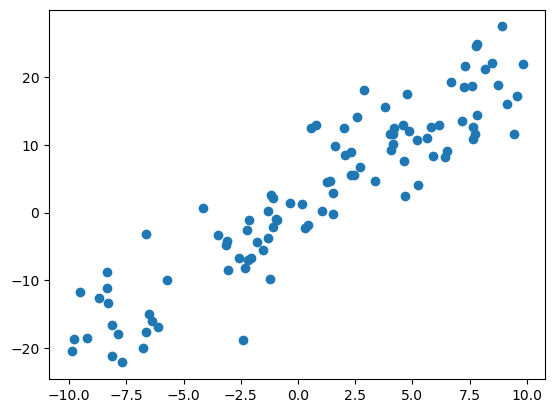

In [10]:
import matplotlib.pyplot as plt
plt.scatter ( x = x_train , y = y_train)

----------------------
## Building the model

Having generated the data we will now build a model for the optimisation problem. For this we need to make a Dense layer with a linear activation function.  If we are interested in tuning intial parameters for this model, then that can accelerate the optimisation process; but here we use the nominal values assigned when randomly initialised.

The parameters of the model are a single weight and a single bias, i.e. $m$ and $c$, respectively. These parameters need to be optimised, and here we use the Mean Square Error loss function. i.e.
$$MSE = \frac{1}{n}\sum\limits_{i=1}^{n} (y_{i} - \widehat{y}(x_{i}))$$

where $\widehat{y}$ is the linear model being fitted, and n is the number of training examples used for the optimisation.

In [11]:
#
# Training configuration
#
Nepochs         = 10 # how many epochs do you think you will need?  start small
learning_rate   = 0.5

# build the model
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(1, activation='linear', input_shape=[1,]) )

# now specify the loss function - MSE
loss_fn = tf.keras.losses.MSE

# now we can train the model to make predictions.
#   Use the ADAM optimiser
#   Specify the metrics to report as accuracy
#   Specify the loss function (see above)
# the fit step specifies the number of training epochs
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss=loss_fn )

print("--------------------------------------------------------------------------------------------------------------")
print("\033[92mWill perform a linear regression optimisation\033[0m")
print("--------------------------------------------------------------------------------------------------------------\n\n")
print("Input data Linear Regression Data")
print("Nepochs              = ", Nepochs)
print("learning rate        = ", learning_rate)
print("Optimser             =  Adam")
print("Loss function        =  MSE")

history  = model.fit( x_train, y_train, epochs=Nepochs)

# Print out the history keys, there is a single key:
#    loss        The loss function evaluated at each epoch for the training set
print("history keys = ", history.history.keys())

print("Display the evolution of the loss as a function of the training epoch")
print("  N(Epochs)                = ", Nepochs)
print("  Initial loss (train)     = {:5.4f}".format( history.history['loss'][0]) )
print("  Final loss (train)       = {:5.4f}".format( history.history['loss'][-1]) )

--------------------------------------------------------------------------------------------------------------
Will perform a linear regression optimisation
--------------------------------------------------------------------------------------------------------------


Input data Linear Regression Data
Nepochs              =  10
learning rate        =  0.5
Optimser             =  Adam
Loss function        =  MSE
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26.4261 
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.4897 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31.3271 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28.2936 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26.8518
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 25.7313
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24.2034
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 27.7754
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.5692

------------
## Output

For this optimisation we care about understanding the evolution of the loss function, but even when this plateaus we may find that the prediction of the model is not perfect. The ultimate goal is to be able obtain a model that fits the data well.  The optimisation process does not involve determination of uncertainties for the parameters, unlike a least squares computation where these can be solved for analyticailly.


Plotting the loss function evolution as a function of training epoch



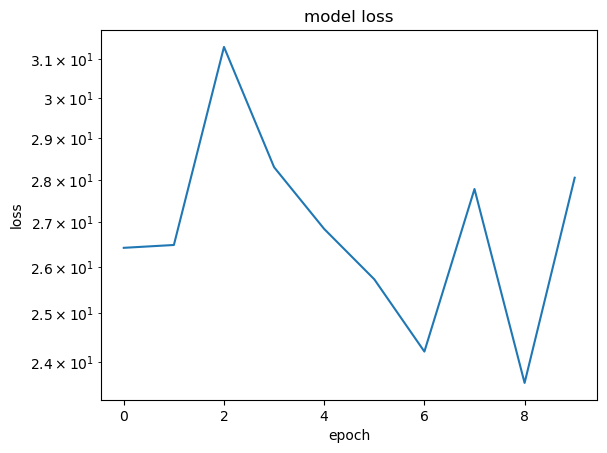

	m =  2.4652107
	c =  1.4475132
	MSE loss = 
	 Fitted line xrange = [-10, 10], y range = [-23.204593539237976, 26.09961998462677]

Plotting the optimised model and test data



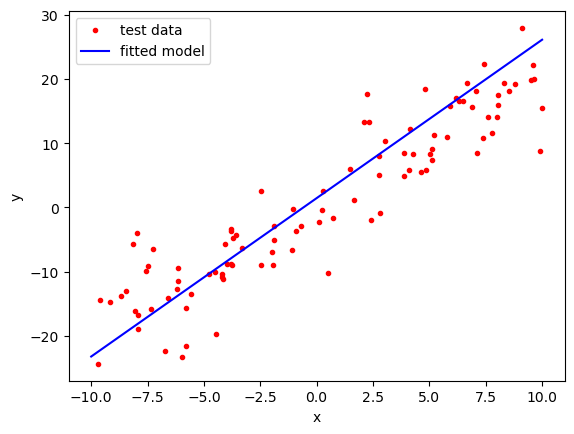

In [12]:
# summarize history for loss
print("\n\033[1mPlotting the loss function evolution as a function of training epoch\033[0m\n")
plt.plot(history.history['loss']) # plot the 'loss' from history.history
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.show()
plt.clf()

# plot the model for the data
# we are interested in the first layer
layer = model.layers[0]
weights, biases = layer.get_weights()
ymin = weights[0][0]*xmin+biases[0]
ymax = weights[0][0]*xmax+biases[0]

print("\tm = ", weights[0][0])
print("\tc = ", biases[0])
print("\tMSE loss = ".format( history.history['loss'][-1]) )
print("\t Fitted line xrange = {:}, y range = {:}".format([xmin, xmax], [ymin, ymax]))

print("\n\033[1mPlotting the optimised model and test data\033[0m\n")
plt.plot(x_test, y_test, "r.") # plot the test data set (x_test, y_test)
plt.plot([xmin, xmax], [ymin, ymax], "b-")  # plot the fitted line
plt.ylabel('y')
plt.xlabel('x')
plt.legend(["test data", "fitted model"], loc=0)
plt.show()


----------------------
## Suggested exercises:

 - Change the number of training examples to see how this affects the optimisation performance (increase by a factor of 10 and decrease by a factor of 10).
 - Change the value of m and c to extract, Try $m=10$, $c=5$, to explore how this affects the training.  You may also need to change the number of epochs when doing this.
 - Change the number of training epochs to see how this affects the optimisation
 - Change the noise level to study how this affects the optimisation.
 - Change the learning rate to explore how robust the training is with the Adam optmiser.
 - You may also wish to explore the use of other optmisers: see https://keras.io/api/optimizers/.